In [24]:
import numpy as np
import matplotlib.pyplot as plt

In [27]:
# Constants
EMPTY = 0
PLAYER_X = 1
PLAYER_O = 2
BOARD_SIZE = 5
WIN_LENGTH = 3
INF = float('inf')

def create_board():
    return np.zeros((BOARD_SIZE, BOARD_SIZE), dtype=int)

def print_board(board):
    for row in board:
        print(" ".join(map(str, row)))
    print()

def plot_board(board):
    plt.figure(figsize=(BOARD_SIZE, BOARD_SIZE))
    plt.plot(*np.where(board == PLAYER_X), 'ro', markersize=30)
    plt.plot(*np.where(board == PLAYER_O), 'bo', markersize=30)
    plt.xlim([-0.5, BOARD_SIZE - 0.5])
    plt.ylim([BOARD_SIZE - 0.5, -0.5])
    plt.grid(True)
    plt.show()

def is_valid_move(board, row, col):
    return 0 <= row < BOARD_SIZE and 0 <= col < BOARD_SIZE and board[row][col] == EMPTY

def get_valid_moves(board):
    return [(r, c) for r in range(BOARD_SIZE) for c in range(BOARD_SIZE) if board[r][c] == EMPTY]

def is_winning_line(board, player, row, col, dr, dc):
    count = 0
    while 0 <= row < BOARD_SIZE and 0 <= col < BOARD_SIZE and board[row][col] == player:
        count += 1
        row, col = row + dr, col + dc
    return count >= WIN_LENGTH

def is_game_over(board, player):
    for r in range(BOARD_SIZE):
        for c in range(BOARD_SIZE):
            if board[r][c] == player:
                for dr, dc in [(-1, 0), (0, -1), (-1, -1), (-1, 1)]:
                    if is_winning_line(board, player, r, c, dr, dc):
                        return True
    return False

def evaluate_heuristic(board, player):
    score = 0
    for r in range(BOARD_SIZE):
        for c in range(BOARD_SIZE):
            if board[r][c] == player:
                for dr, dc in [(1, 0), (0, 1), (1, 1), (-1, 1)]:
                    count = 0
                    row, col = r, c
                    while 0 <= row < BOARD_SIZE and 0 <= col < BOARD_SIZE and board[row][col] == player:
                        count += 1
                        row, col = row + dr, col + dc
                    score += count

    return score

def alpha_beta_minimax(board, depth, alpha, beta, maximizing_player):
    if depth == 0 or is_game_over(board, PLAYER_X) or is_game_over(board, PLAYER_O):
        return evaluate_heuristic(board, PLAYER_X) - evaluate_heuristic(board, PLAYER_O)

    valid_moves = get_valid_moves(board)
    if maximizing_player:
        max_eval = -INF
        for move in valid_moves:
            r, c = move
            board[r][c] = PLAYER_X
            eval = alpha_beta_minimax(board, depth - 1, alpha, beta, False)
            board[r][c] = EMPTY
            max_eval = max(max_eval, eval)
            alpha = max(alpha, eval)
            if beta <= alpha:
                break
        return max_eval
    else:
        min_eval = INF
        for move in valid_moves:
            r, c = move
            board[r][c] = PLAYER_O
            eval = alpha_beta_minimax(board, depth - 1, alpha, beta, True)
            board[r][c] = EMPTY
            min_eval = min(min_eval, eval)
            beta = min(beta, eval)
            if beta <= alpha:
                break
        return min_eval

def get_best_move_alpha_beta(board, depth):
    valid_moves = get_valid_moves(board)
    best_eval = -INF
    best_move = None
    alpha = -INF
    beta = INF
    for move in valid_moves:
        r, c = move
        board[r][c] = PLAYER_X
        eval = alpha_beta_minimax(board, depth=depth, alpha=alpha, beta=beta, maximizing_player=False)
        board[r][c] = EMPTY
        if eval > best_eval:
            best_eval = eval
            best_move = move
        alpha = max(alpha, eval)
    return best_move

def play_gomoku(depth=3):
    board = create_board()
    current_player = PLAYER_O

    print("Welcome to Gomoku!")
    plot_board(board)
    # print_board(board)

    while not is_game_over(board, PLAYER_X) and not is_game_over(board, PLAYER_O):
        if current_player == PLAYER_X:
            row, col = get_best_move_alpha_beta(board, depth)
        else:
            while True:
                row, col = map(int, input("Enter your move (row column): ").split())
                if is_valid_move(board, row, col):
                    break
                print("Invalid move. Try again.")

        board[row][col] = current_player
        # print_board(board)
        plot_board(board)

        if current_player == PLAYER_X:
            current_player = PLAYER_O
        else:
            current_player = PLAYER_X

    if is_game_over(board, PLAYER_X):
        print("Player X wins!")
    elif is_game_over(board, PLAYER_O):
        print("Player O wins!")
    else:
        print("It's a draw!")

Welcome to Gomoku!


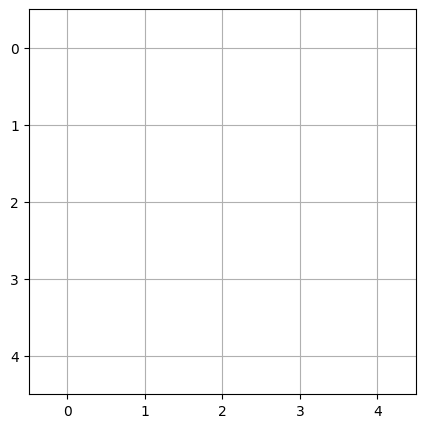

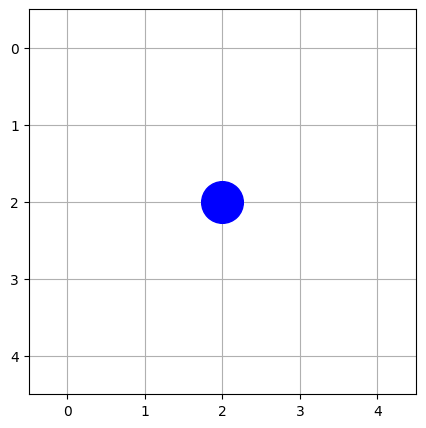

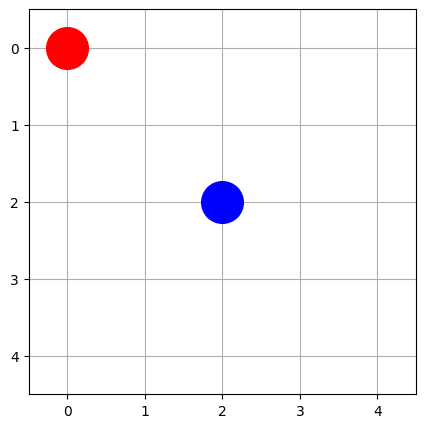

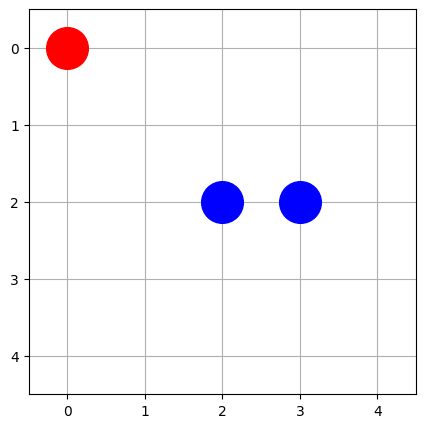

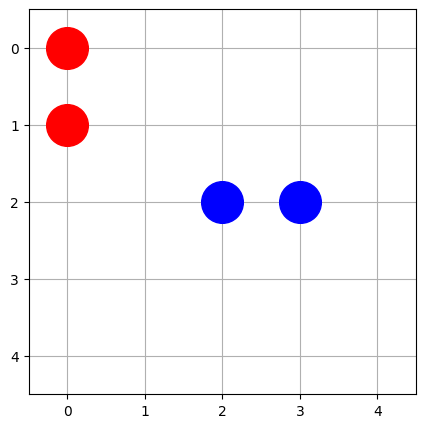

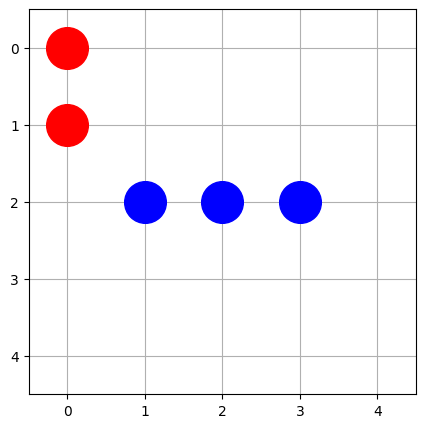

Player O wins!


In [30]:
play_gomoku(5)